# **Importing Necessary Libraries**


In [ ]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import pandas as pd


# **Reading Data in Chunks**

**The data is read in chunks to handle large datasets that don’t fit into memory.This is done to prevent memory errors that can occur when trying to load a large dataset all at once.**

In [ ]:
chunksize = 10 ** 6
chunks = []
for chunk in pd.read_csv("/content/fraudTrain.csv", chunksize=chunksize):
    chunks.append(chunk)

# Concatenate the chunks into one DataFrame as ML algorithms works with data in single dataframe
#or array-like structure
df = pd.concat(chunks, axis=0)
del chunks

# **Dataset Attributes**
* trans_date_trans_time	-Transaction DateTime
* cc_num	-Credit Card Number of Customer
* merchant	-Merchant Name
* category	-Category of Merchant
* amt	-Amount of Transaction
* first	-First Name of Credit Card Holder
* last	-Last Name of Credit Card Holder
* gender	-Gender of Credit Card Holder
* street	-Street Address of Credit Card Holder
* city	-City of Credit Card Holder
* state	-State of Credit Card Holder
* zip	-Zip of Credit Card Holder
* lat	-Latitude Location of Credit Card Holder
* long	-Longitude Location of Credit Card Holder
* city_pop	-Credit Card Holder’s City Population
* job	-Job of Credit Card Holder
* dob	-Date of Birth of Credit Card Holder
* trans_num	-Transaction Number
* unix_time	-UNIX Time of transaction
* merch_lat	-Latitude Location of Merchant
* merch_long	-Longitude Location of Merchant
* is_fraud	-Fraud Flag <— Target Class

#**Exploring the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27259 entries, 0 to 27258
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             27259 non-null  int64  
 1   trans_date_trans_time  27259 non-null  object 
 2   cc_num                 27259 non-null  int64  
 3   merchant               27259 non-null  object 
 4   category               27259 non-null  object 
 5   amt                    27259 non-null  float64
 6   first                  27259 non-null  object 
 7   last                   27259 non-null  object 
 8   gender                 27259 non-null  object 
 9   street                 27259 non-null  object 
 10  city                   27258 non-null  object 
 11  state                  27258 non-null  object 
 12  zip                    27258 non-null  float64
 13  lat                    27258 non-null  float64
 14  long                   27258 non-null  float64
 15  ci

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


**Checking the missing values**

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

# **Preprocessing the data**

**Dropping unnecessary columns**

In [ ]:
# Use inplace=True to drop columns without creating a new DataFrame
df.drop(columns=["Unnamed: 0", "trans_num", "street"], inplace=True)

**'data' contains first n that is first 20000 rows of the dataframe**

In [ ]:
data = df.head(n = 10000)

**get_dummies() function is used to convert categorical variable into binary variable**

In [ ]:
df_processed = pd.get_dummies(data=data)
df_processed

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,dob_2001-07-10,dob_2001-07-26,dob_2001-12-19,dob_2003-05-07,dob_2003-09-14,dob_2004-03-18,dob_2004-05-08,dob_2004-06-19,dob_2004-12-30,dob_2005-01-29
0,2703186189652095,4.97,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,0.0,...,False,False,False,False,False,False,False,False,False,False
1,630423337322,107.23,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,0.0,...,False,False,False,False,False,False,False,False,False,False
2,38859492057661,220.11,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,0.0,...,False,False,False,False,False,False,False,False,False,False
3,3534093764340240,45.00,59632.0,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,0.0,...,False,False,False,False,False,False,False,False,False,False
4,375534208663984,41.96,24433.0,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6011399591920186,93.06,1257.0,42.1001,-73.3611,2121.0,1.325908e+09,41.603464,-73.171564,0.0,...,False,False,False,False,False,False,False,False,False,False
9996,4467456915153312231,63.62,33620.0,28.0600,-82.4079,717255.0,1.325908e+09,27.088400,-83.180925,0.0,...,False,False,False,False,False,False,False,False,False,False
9997,4689147265057948423,5.71,68403.0,40.9207,-96.1680,206.0,1.325908e+09,40.633368,-96.595273,0.0,...,False,False,False,False,False,False,False,False,False,False
9998,373905417449658,231.45,76665.0,31.9290,-97.6443,2526.0,1.325908e+09,32.807117,-98.639187,0.0,...,False,False,False,False,False,False,False,False,False,False


**Splitting the data into x train and y train**

In [ ]:
x_train = df_processed.drop(columns='is_fraud', axis=1)
y_train = df_processed['is_fraud']
del data

# **Repeating the same preprocessing for Testing data**

In [ ]:
# Read test data in chunks, specifying the number of columns
chunks_test = []
for chunk in pd.read_csv("/content/fraudTest.csv", chunksize=chunksize, usecols=range(23)):
    chunks_test.append(chunk)

df_test = pd.concat(chunks_test, axis=0)
del chunks_test

**Dropping unnecessary columns**

In [ ]:
df_test.drop(columns=["Unnamed: 0", "trans_num", "street"], inplace=True)

In [ ]:
data_test = df_test.sample(frac=1, random_state=1).reset_index()
data_test = data_test.head(n = 10000)

In [ ]:
df_processed_test = pd.get_dummies(data=data_test)
df_processed_test

,index,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,dob_2001-07-10,dob_2001-07-26,dob_2001-12-19,dob_2003-05-07,dob_2003-09-14,dob_2004-03-18,dob_2004-05-08,dob_2004-06-19,dob_2004-12-30,dob_2005-01-29
0,15071,4099707841315751,42.58,22968,38.2586,-78.4074,9815.0,1.372255e+09,38.367989,-78.127000,...,False,False,False,False,False,False,False,False,False,False
1,20463,38797410705641,64.81,12460,42.4069,-74.1528,277.0,1.372432e+09,43.197875,-74.677895,...,False,False,False,False,False,False,False,False,False,False
2,5910,4512828414983801773,3.70,15484,39.8936,-79.7856,328.0,1.371942e+09,39.731947,-80.336822,...,False,False,False,False,False,False,False,False,False,False
3,18177,180017442990269,19.68,12222,42.6853,-73.8253,151022.0,1.372363e+09,42.445967,-74.331293,...,False,False,False,False,False,False,False,False,False,False
4,21405,3545109339866548,4.21,38761,33.4783,-90.5142,2870.0,1.372451e+09,33.928491,-90.968680,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7400,30560609640617,2.98,63453,40.4931,-91.8912,519.0,1.371982e+09,40.142886,-91.843724,...,False,False,False,False,False,False,False,False,False,False
9996,9064,3547560454237873,24.83,49613,44.5232,-86.2061,680.0,1.372015e+09,44.288483,-86.270992,...,False,False,False,False,False,False,False,False,False,False
9997,3411,3560246577314524,4.90,67216,37.6223,-97.3136,409656.0,1.371897e+09,38.118816,-96.830635,...,False,False,False,False,False,False,False,False,False,False
9998,16048,341542810616333,26.89,64017,39.2048,-94.0259,464.0,1.372284e+09,39.754316,-93.308072,...,False,False,False,False,False,False,False,False,False,False


**splitting the data into x test and y test**

In [ ]:
x_test = df_processed_test.drop(columns='is_fraud', axis=1)
y_test = df_processed_test['is_fraud']
del data_test,df_processed_test

**Consistent columns ensures that the training and test data have the same columns**

In [ ]:
#Ensuring Consistent Columns
train_cols = x_train.columns
test_cols = x_test.columns

# Find the columns that are in the training data but not in the test data
missing_cols = set(train_cols) - set(test_cols)

# Add these columns to the test data and fill them with zeros
for c in missing_cols:
    x_test[c] = 0

# Ensure the order of columns in the test data matches the order in the training data
x_test = x_test[train_cols]

Streaming output truncated to the last 5000 lines.
<ipython-input-17-85645b6c6bd9>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[c] = 0
<ipython-input-17-85645b6c6bd9>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[c] = 0
<ipython-input-17-85645b6c6bd9>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `new

# **Analyzing the data**

**Separating legitimate transactions from fraudulent ones to analyze.**

In [ ]:
legit = df[df.is_fraud==0]
fraud = df[df.is_fraud==1]
print(legit.shape)
print(fraud.shape)

(27003, 20)
(255, 20)


In [ ]:
# Statistical measures of the data are computed for the amount of money involved in both types of transactions.
print(legit.amt.describe())
print(fraud.amt.describe())

count    27003.00000
mean        67.69936
std        141.65011
min          1.00000
25%          9.61000
50%         47.51000
75%         82.62000
max      11872.21000
Name: amt, dtype: float64
count     255.000000
mean      509.729843
std       383.541251
min         4.500000
25%       257.110000
50%       337.050000
75%       853.795000
max      1254.270000
Name: amt, dtype: float64


**selecting some random transactions from the legit transactions to balance with the fraud transactions**

In [ ]:
legit_sample = legit.sample(n=fraud.shape[0])
print(legit_sample.shape)

(255, 20)


**Concatenating legit_sample and fraud dataframes**

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)
print(new_dataset.head())
print(new_dataset.tail())
print(new_dataset['is_fraud'].value_counts())


      trans_date_trans_time            cc_num  \
22062   2019-01-14 04:17:39      675909898057   
10520   2019-01-07 10:51:22   347073228412010   
18054   2019-01-11 21:00:40  4003989662068504   
19987   2019-01-13 04:19:02   213136802746375   
1999    2019-01-01 20:37:01      676308307625   

                                 merchant       category     amt        first  \
22062   fraud_Schultz, Simonis and Little    grocery_pos   65.01  Christopher   
10520                     fraud_Price Inc   shopping_net   96.21         Ryan   
18054                 fraud_Monahan-Morar  personal_care    5.00        Chris   
19987  fraud_Mosciski, Gislason and Mertz    grocery_pos  145.02    Christine   
1999                   fraud_Donnelly LLC  entertainment    2.98       Donald   

          last gender           city state      zip      lat      long  \
22062    Henry      M         Armonk    NY  10504.0  41.1360  -73.7009   
10520  Johnson      M           Alva    WY  82711.0  44.6873 -104.4414

# **Feature Engineering**

**Calculating the average transaction amount**

In [ ]:
avg_transaction_amount_nameOrig = new_dataset.groupby('cc_num')['amt'].mean()
avg_transaction_amount_nameDest = new_dataset.groupby('merchant')['amt'].mean()
print(avg_transaction_amount_nameOrig)
print(avg_transaction_amount_nameDest)


cc_num
501882822387            58.48
501899453424            15.95
502012776709            19.42
502038091380            80.18
567868110212            60.39
                        ...  
4810839835482794272     21.99
4855488158131690372     38.33
4861310130652566408    117.07
4956828990005111019     42.06
4958589671582726883     24.08
Name: amt, Length: 246, dtype: float64
merchant
fraud_Abbott-Rogahn                        11.950000
fraud_Abbott-Steuber                       12.225000
fraud_Abernathy and Sons                  120.580000
fraud_Adams-Barrows                       184.250000
fraud_Altenwerth, Cartwright and Koss    1016.783333
                                            ...     
fraud_Witting, Beer and Ernser             96.240000
fraud_Wiza, Schaden and Stark               4.570000
fraud_Yost, Schamberger and Windler        18.880000
fraud_Zboncak, Rowe and Murazik           498.175000
fraud_Zieme, Bode and Dooley               36.685000
Name: amt, Length: 336, dtype: f

**Creating a new column to indicate if a transaction is fraudulent**

In [ ]:
new_dataset['is_fraudulent'] = new_dataset['is_fraud'] == 1

**Counting the number of fraudulent transactions for each cc_num and merchant**

In [ ]:
origination_fraud_count = new_dataset.groupby('cc_num')['is_fraudulent'].sum()
destination_fraud_count = new_dataset.groupby('merchant')['is_fraudulent'].sum()

In [ ]:
# Merging the counts
fraud_history = origination_fraud_count.add(destination_fraud_count, fill_value=0).astype(int)

# Adding a 'fraud_history' as a new column
new_dataset['previous_fraudulent_transactions'] = new_dataset['cc_num'].map(fraud_history).fillna(0)
print(new_dataset[['previous_fraudulent_transactions']])
print(new_dataset.info())


       previous_fraudulent_transactions
22062                                 0
10520                                 0
18054                                 0
19987                                 0
1999                                  0
...                                 ...
26649                                 6
26815                                 6
26920                                 8
27221                                10
27254                                 2

[510 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 22062 to 27254
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   trans_date_trans_time             510 non-null    object 
 1   cc_num                            510 non-null    int64  
 2   merchant                          510 non-null    object 
 3   category                          510 non-null    object 
 4   amt    

**SimpleImputer class is used to handle missing values in the data.**

*   For features-replaced with mean
*   For target-replaced with most frequent value

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the training data
imputer.fit(x_train)

# Transform the training and test data
x_train_imputed = imputer.transform(x_train)
x_test_imputed = imputer.transform(x_test)

In [ ]:
imputer_y = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit the imputer on the training target data
imputer_y.fit(y_train.values.reshape(-1,1))

# Transform the training target data
y_train_imputed = imputer_y.transform(y_train.values.reshape(-1,1))

**StandardScaler class is used to scale the data because Machine learning algorithms perform better when the input features are on a similar scale.**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
x_train_scaled = scaler.fit_transform(x_train_imputed)

# Use the same scaler to transform the test data
x_test_scaled = scaler.transform(x_test_imputed)

# **Modelling**

**Logistic Regression**

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_scaled, y_train_imputed.ravel())

y_pred = log_reg.predict(x_test_scaled)
y_test = y_test.fillna(y_test.mode().iloc[0])
#Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")

#Classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred, zero_division=0)
print(f"Classification Report: \n{class_report}")

Model Accuracy: 0.9917
Confusion Matrix: 
[[9917   33]
 [  50    0]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      9950
         1.0       0.00      0.00      0.00        50

    accuracy                           0.99     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.99      0.99      0.99     10000



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train_imputed.ravel())

y_pred_dt = dt.predict(x_test_scaled)
y_test = y_test.fillna(y_test.mode().iloc[0])
#Accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy: {accuracy_dt}")

#confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f"Decision Tree Confusion Matrix: \n{conf_matrix_dt}")

#classification report
class_report_dt = classification_report(y_test, y_pred_dt, zero_division=0)
print(f"Decision Tree Classification Report: \n{class_report_dt}")


Decision Tree Model Accuracy: 0.9941
Decision Tree Confusion Matrix: 
[[9940   10]
 [  49    1]]
Decision Tree Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9950
         1.0       0.09      0.02      0.03        50

    accuracy                           0.99     10000
   macro avg       0.54      0.51      0.51     10000
weighted avg       0.99      0.99      0.99     10000



**KNN**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train_imputed.ravel())

y_pred_knn = knn.predict(x_test_scaled)
y_test = y_test.fillna(y_test.mode().iloc[0])

#Accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy_knn}")

#Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(f"KNN Confusion Matrix: \n{conf_matrix_knn}")

#Classification report
class_report_knn = classification_report(y_test, y_pred_knn, zero_division=0)
print(f"KNN Classification Report: \n{class_report_knn}")

KNN Model Accuracy: 0.995
KNN Confusion Matrix: 
[[9950    0]
 [  50    0]]
KNN Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      9950
         1.0       0.00      0.00      0.00        50

    accuracy                           0.99     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.99      0.99      0.99     10000



# **Plotting Confusion Matrix of the 3 Models**

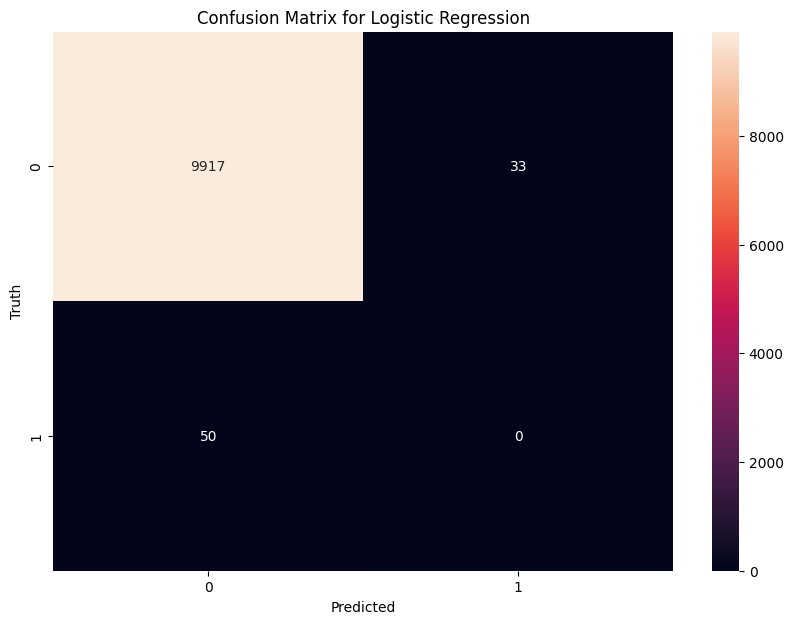

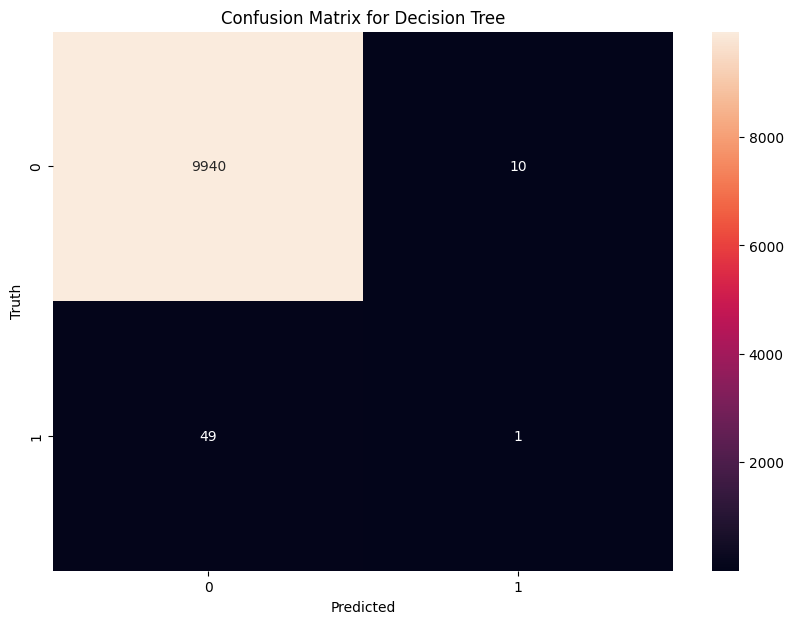

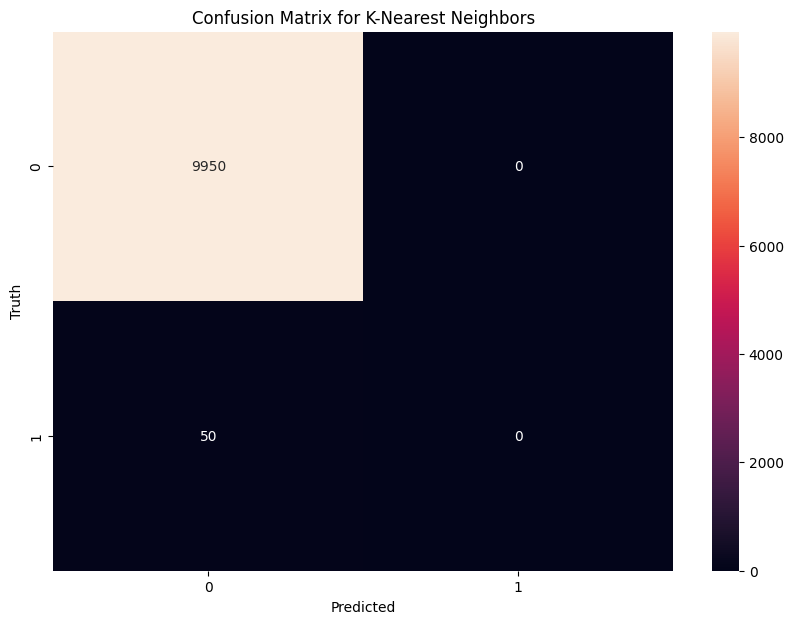

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(10,7))
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

plot_confusion_matrix(conf_matrix, 'Logistic Regression')

plot_confusion_matrix(conf_matrix_dt, 'Decision Tree')

plot_confusion_matrix(conf_matrix_knn, 'K-Nearest Neighbors')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


def predict_fraud(transaction_details):
    try:
        # Create a DataFrame from the input transaction details
        features = pd.DataFrame(transaction_details, index=[0])

        # Impute missing values
        features_imputed = imputer.transform(features)

        # Scale the features
        features_scaled = scaler.transform(features_imputed)

        # Make predictions
        prediction = log_reg.predict(features_scaled)

        # Return the prediction (0 for legitimate, 1 for fraudulent)
        return int(prediction[0])
    except Exception as e:
        return f"Error: {str(e)}"

# Interactive input form
transaction_details = {
    'trans_date_trans_time': input("Transaction Date and Time (YYYY-MM-DD HH:MM:SS): "),
    'cc_num': input("Credit Card Number (16 digits): "),
    'merchant': input("Merchant Name: "),
    'amt': float(input("Transaction Amount: ")),
    'first': input("First Name of Credit Card Holder: "),
    'last': input("Last Name of Credit Card Holder: "),
    'gender': input("Gender (M/F): "),
    'city': input("City of Credit Card Holder: "),
    'state': input("State of Credit Card Holder: "),
    'zip': input("Zip Code of Credit Card Holder: "),
    'lat': float(input("Latitude Location of Credit Card Holder: ")),
    'long': float(input("Longitude Location of Credit Card Holder: ")),
    'city_pop': int(input("City Population of Credit Card Holder: ")),
    'job': input("Job of Credit Card Holder: "),
    'dob': input("Date of Birth of Credit Card Holder (YYYY-MM-DD): "),
}

fraud_prediction = predict_fraud(transaction_details)
if fraud_prediction == 0:
    print("Legitimate transaction")
else:
    print("Fraudulent transaction")


Transaction Date and Time (YYYY-MM-DD HH:MM:SS): 01-01-2019  00:00:18
Credit Card Number (16 digits): 2703186189652090
Merchant Name: fraud_Rippin, Kub and Mann
Transaction Amount: 4.97
First Name of Credit Card Holder: Jennifer
Last Name of Credit Card Holder: Banks
Gender (M/F): F
City of Credit Card Holder: Moravian Falls
State of Credit Card Holder: nc
Zip Code of Credit Card Holder: 28654
Latitude Location of Credit Card Holder: 36.0788
Longitude Location of Credit Card Holder: -81.1781
City Population of Credit Card Holder: 3495
Job of Credit Card Holder: Psychologist, counselling
Date of Birth of Credit Card Holder (YYYY-MM-DD): 1988-03-09
Fraudulent transaction
